In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



In [16]:
# Load the dataset
url = "house_rental_data.csv"
df = pd.read_csv(url)

In [3]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non

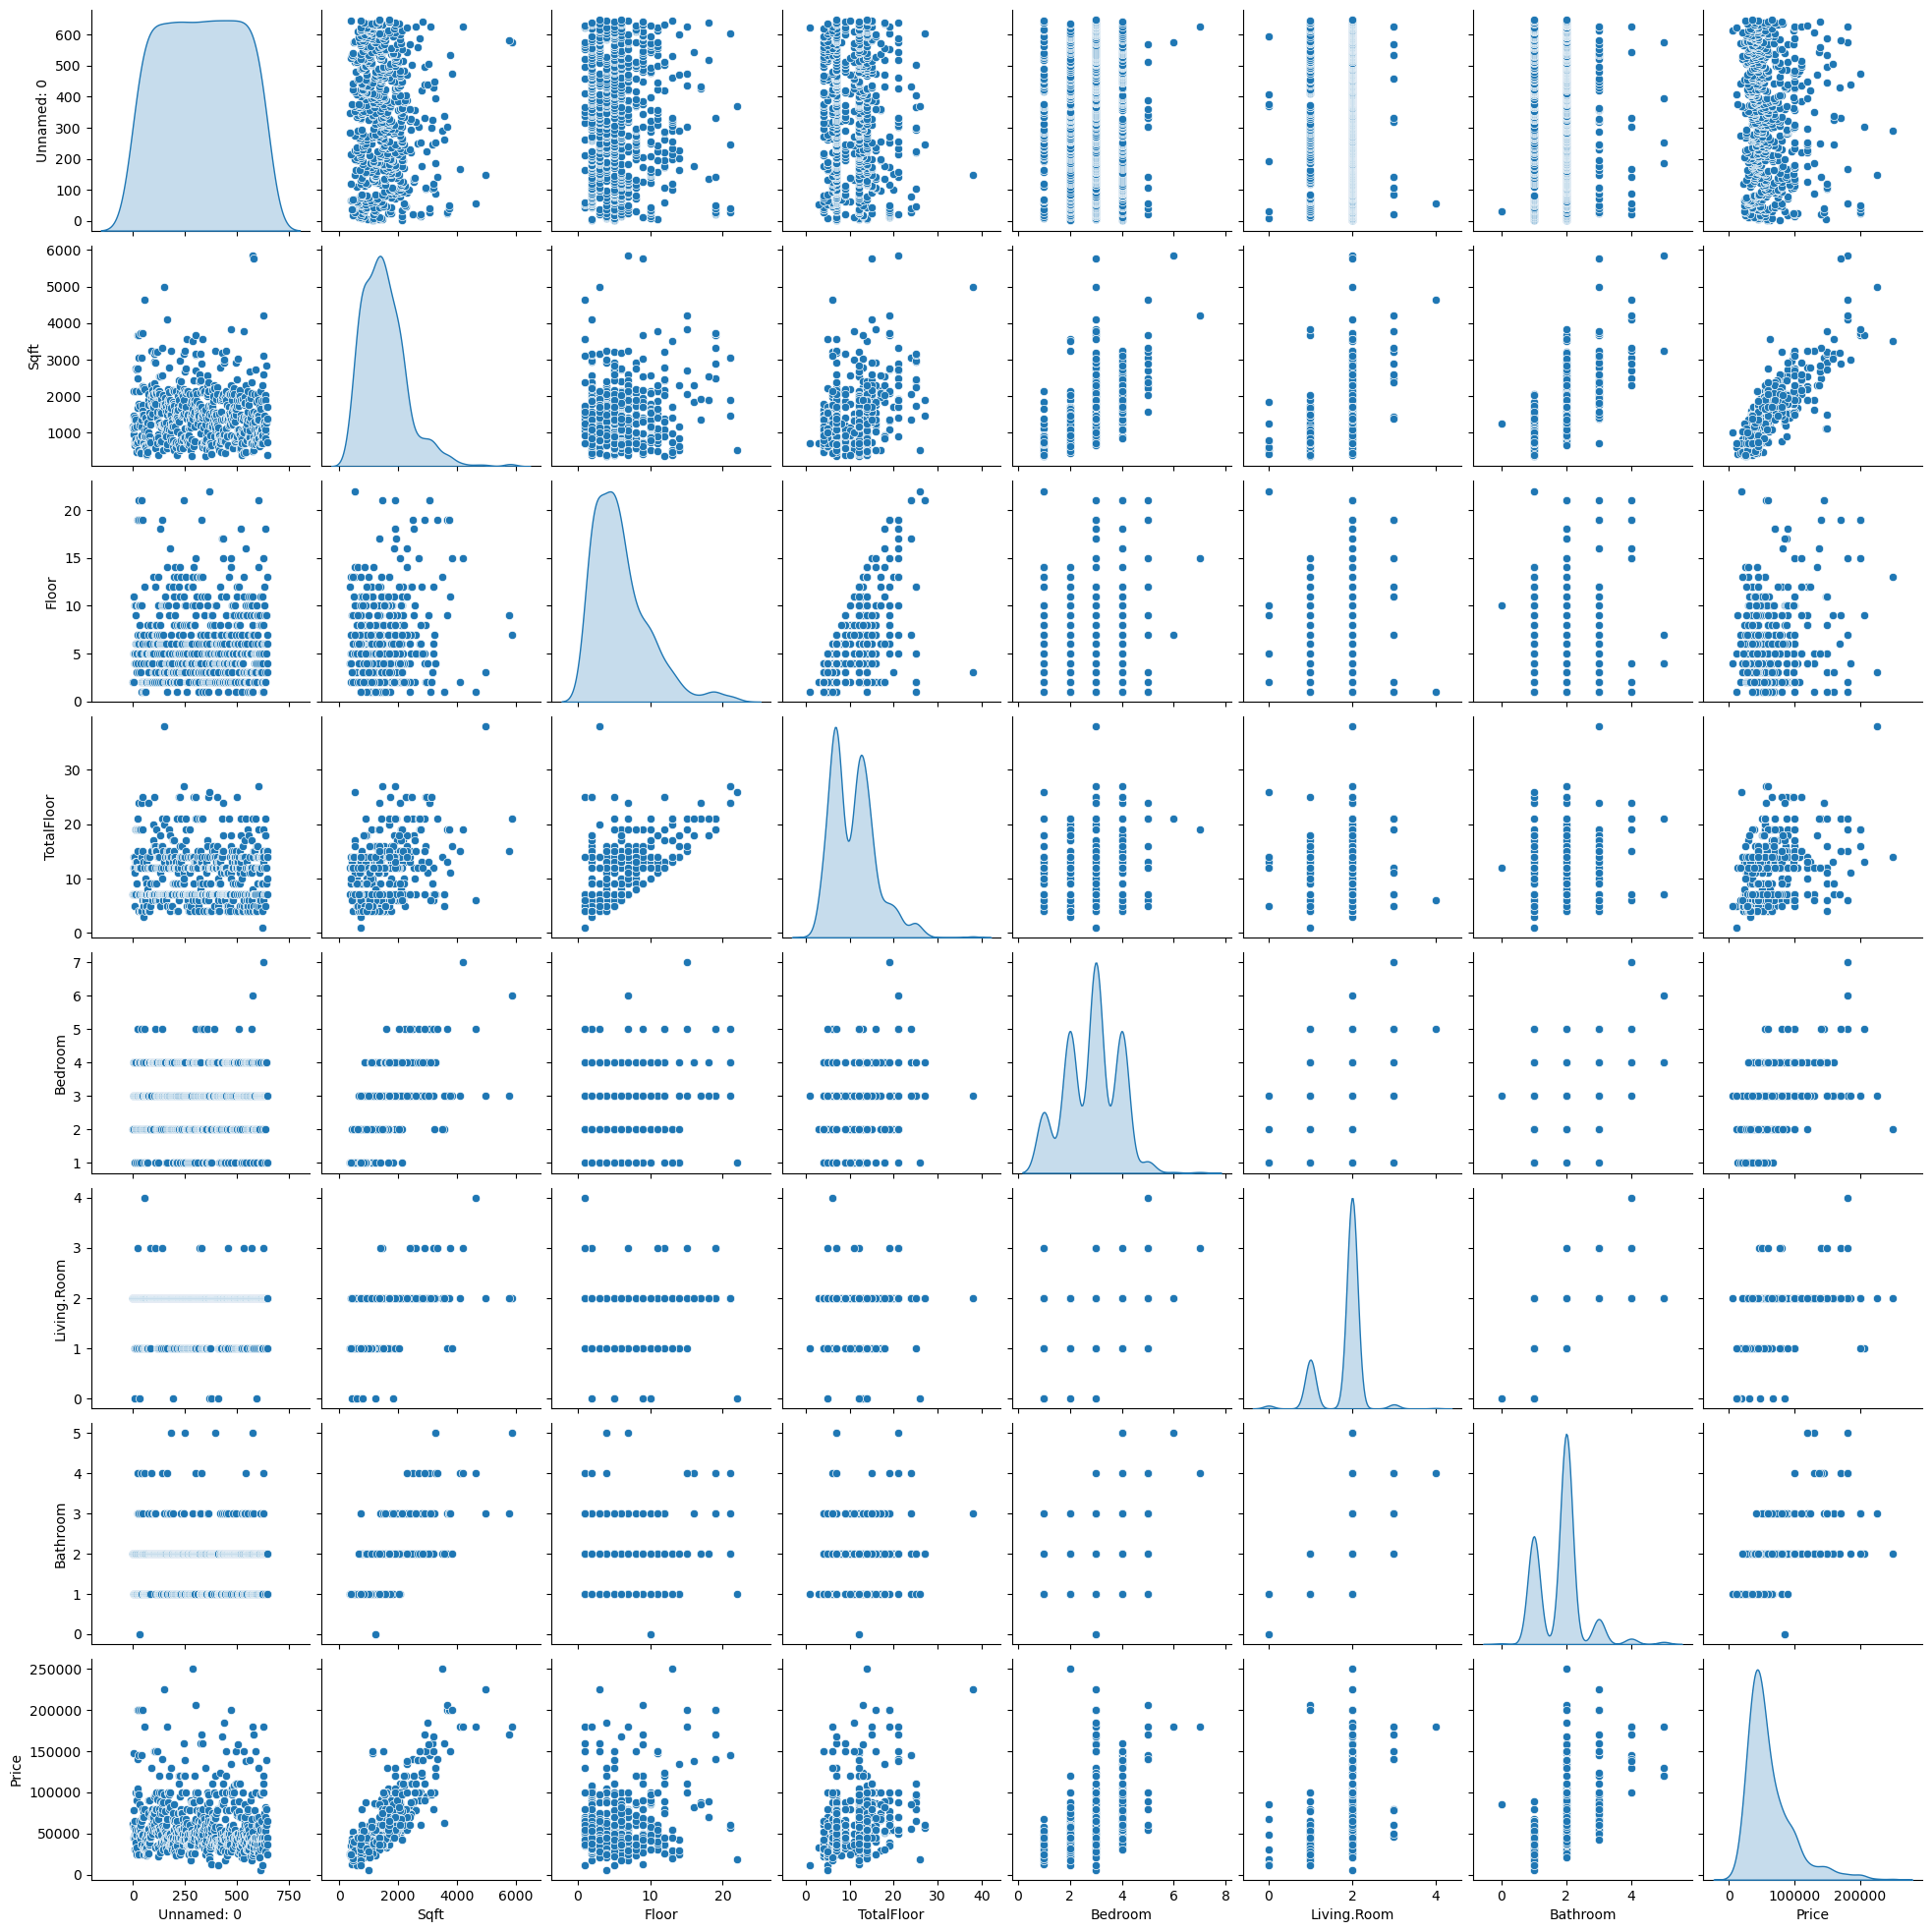

In [4]:
# Visualize the data
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.show()

In [5]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


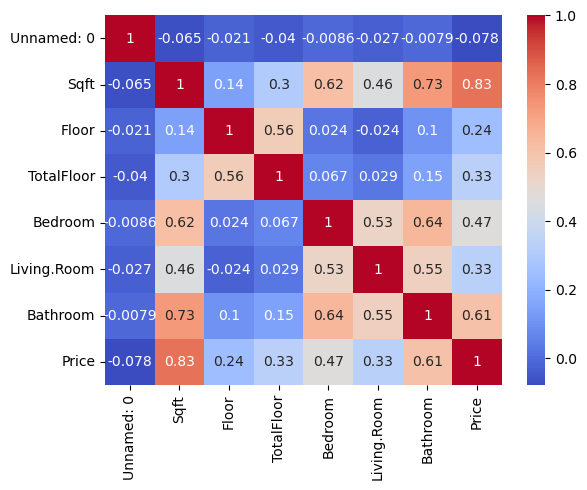

In [6]:
# Check for correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
# # Data preprocessing
# # Drop unnecessary columns (if any)
# df = df.drop(['Unnamed: 0'], axis=1)

In [11]:
# Handle categorical variables (if any) using one-hot encoding
df = pd.get_dummies(df)

In [19]:
# Split the data into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 401068215.2501169
R-squared: 0.7205009707940982
